


<h1> TITANIC DATA ANALYTICS USING PYTHON PANDAS AND MATPLOTLIB</h1>

<h3> READING THE DATASET AND MAKING A COPY OF IT FOR THE PANEL</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import panel as pn
import hvplot.pandas

df=pd.read_csv('book1.csv', encoding='latin-1')
pn.state.cache['data'] = df.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h3><u>DATA DICTIONARY</u></h3>

| Key            | Variable          | Definition                                      |
|----------------|-------------------|-------------------------------------------------|
| survival       | Survival          | 0 = No, 1 = Yes                                 |
| pclass         | Ticket class      | 1 = 1st, 2 = 2nd, 3 = 3rd                        |
| sex            | Sex               |                                                 |
| Age (years)    | Age               |                                                 |
| sibsp          | # of siblings/spouses aboard the Titanic |
| parch          | # of parents/children aboard the Titanic |
| ticket         | Ticket number     |                                                 |
| fare (£)       | Passenger fare    |                                                 |
| cabin          | Cabin number      |                                                 |
| embarked       | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

<h3>Data Exploration</h3>

In [2]:
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
a=df.columns
a

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3>Handling missing data values</h3>

In [8]:
cab=df['Cabin'].isna().sum()
print("cabin values which are missing: ",cab)

gen=df['Sex'].isna().sum()
print("gender values which are missing: ",gen)

age=df['Age'].isna().sum()
print("Age values which are missing: ",age)

embark=df['Embarked'].isnull().sum()
print("embarked/destination values which are missing: ",embark)

cabin values which are missing:  687
gender values which are missing:  0
Age values which are missing:  177
embarked/destination values which are missing:  2


In [9]:
df['Embarked'] = df['Embarked'].map({ 'S': "Cherbourg" , 'C': "Queenstown" , 'Q': "Southampton" })

In [10]:
a= df['Embarked'].value_counts()
a.name='Port of Embarktion'
print(a)

Embarked
Cherbourg      644
Queenstown     168
Southampton     77
Name: Port of Embarktion, dtype: int64


In [11]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Cherbourg
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Queenstown
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Cherbourg
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Cherbourg
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Cherbourg


 <h3> DEALING WITH MISSING VALUES </h3>

In [12]:
mean_value = df['Age'].mean()

df['Age'].fillna(mean_value, inplace=True)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,Cherbourg
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,Cherbourg
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,Cherbourg
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,Queenstown
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Southampton


<u><h3>GAINING INSIGHTS FROM THE DATASET </h3></u>
* How many siblings/spouse were on the ship
* Who was the Captain of the Ship
* Number of people who survived and died
* How many males and females were on the ship
* Number of females and males survived the incident
* Graph based on:
  * boarded number of people
  * survived number of people
  * died number of people
* Graph of survived individuals based on gender
* Graph of survival count based on age group
* Graph of survival rate based on Passenger class

In [15]:
sib=df['SibSp'].sum()
print("Number of siblings/spouse present on the ship:",sib)

Number of siblings/spouse present on the ship: 466


In [16]:
df[df["Name"].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,Cherbourg


In [17]:
female = df['Sex'].value_counts()['female']
male = df['Sex'].value_counts()['male']
survived_people = df['Survived'].sum()
total_people=female + male
died_people = total_people - survived_people

a1= f"ACCORDING TO DATASET: "
a2= f"Total number of people: {total_people}"
a3= f"Number of injured people: {survived_people}"
a4= f"Number of deaths: {died_people}"
a5= f"aboarded number of females: {female}"
a6= f"aboarded number of males: {male}"

data1= pn.pane.Markdown(a2)
data2= pn.pane.Markdown(a3)
data3= pn.pane.Markdown(a4)
data4= pn.pane.Markdown(a5)
data5= pn.pane.Markdown(a6)

In [18]:
survived_female = df.groupby('Sex')['Survived'].value_counts()['female']    

f1= f"\nfemale passengers description: \n {survived_female} "

In [19]:
survived_male = df.groupby('Sex')['Survived'].value_counts()['male']

m1= f"\nmale passengers description: \n {survived_male} "

In [20]:
data = pd.DataFrame({'People': ['Boarded', 'Injured', 'Deaths'],
                     'Number': [total_people, survived_people, died_people]})

people_plot = data.hvplot(kind='scatter', x='People', y='Number', marker='o', size=13, color='red') * \
            data.hvplot(kind='line', x='People', y='Number', color='green')

people_plot.opts(xlabel='Types of People', ylabel='Number', title='Number of People', 
                 fontsize={'xlabel': 18, 'ylabel': 16, 'title': 20})
people_plot

:Overlay
   .Scatter.I :Scatter   [People]   (Number)
   .Curve.I   :Curve   [People]   (Number)

In [21]:
by_gender = df.groupby('Sex')['Survived'].sum()
survived_plot = by_gender.hvplot(kind='bar', xlabel='Gender', ylabel='Number of Survived Individuals', title='Number of Survived Individuals by Gender', color='green')

survived_plot

:Bars   [Sex]   (Survived)

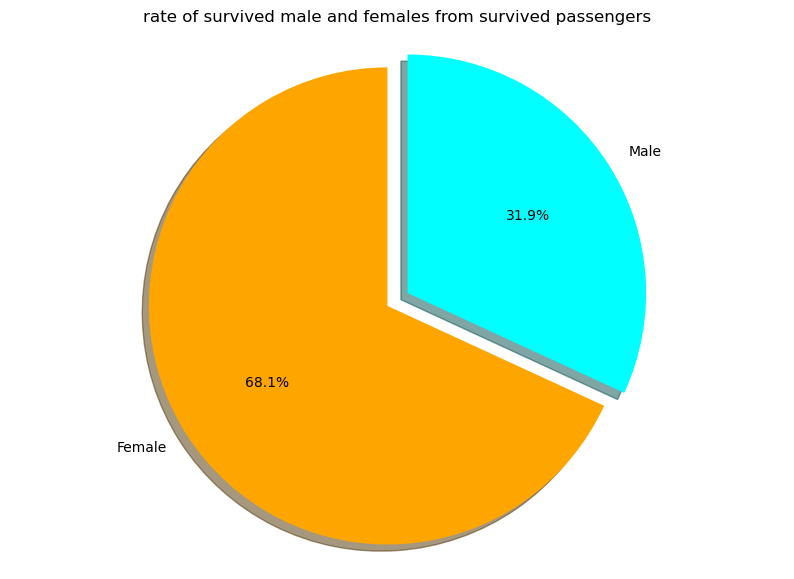

In [22]:
Gender = ['Female','Male']
explode = (0.1, 0.0)
colors = ("orange", "cyan")

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(by_gender , explode=explode, labels=Gender, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("rate of survived male and females from survived passengers")
plt.show()

In [23]:
# Define age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 70, 100],
                        labels=['Underage (0-18)', 'Young Adult (18-30)', 'Middle Age (30-50)',
                                'Adult (50-70)', 'Elder Citizen (70-100)'])
by_age = df.groupby('AgeGroup',observed=False)['Survived'].sum()

ageplot = by_age.hvplot(kind='bar' , xlabel='Age Group', ylabel='Survival Count',title='Survival Count by Age Group')
ageplot

:Bars   [AgeGroup]   (Survived)

In [24]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class = survival_by_class*100

survived_class_plot = survival_by_class.hvplot(kind='bar', xlabel='Passenger class', ylabel='Rate of Survival', title='Rate of Survived Individuals by Pclass', color='green')
survived_class_plot

:Bars   [Pclass]   (Survived)

<h3>CORRELATION BETWEEN COLOUMNS</h3>

In [25]:
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


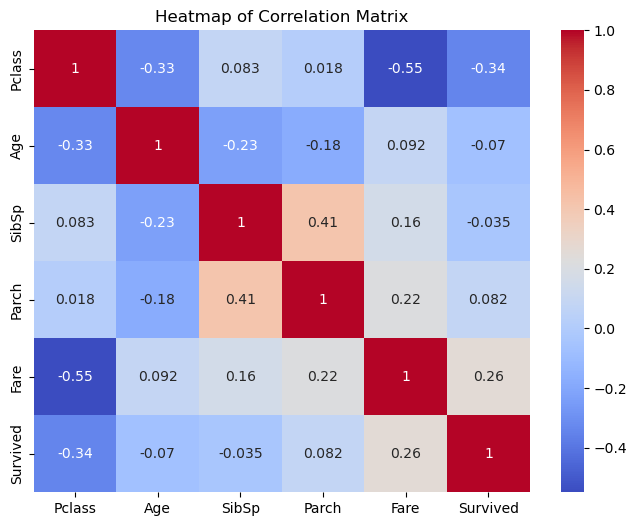

In [26]:
correlation_matrix = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation Matrix")
plt.show()

<u><h3> MACHINE LEARNING USING RANDOM FOREST CLASSIFIER</h3></u>
* By building a machine learning model on the Titanic dataset It will allows us to apply predictive analytics to a real-world scenario.
  By predicting whether a passenger survived based on their characteristics, we're essentially simulating the decision-making process that could have occurred during the Titanic disaster.

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Cherbourg,Young Adult (18-30)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Queenstown,Middle Age (30-50)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Separate features and target
features = df.drop(['Name','Sex','Ticket','Cabin','Embarked','AgeGroup'], axis=1)
target = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [31]:
#Fitting Decision Tree classifier to the training set  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")

classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:
# Evaluate the model
c11= classifier.score(X_test, y_test)
c1= f"random forest model score: {c11}"

In [33]:
#Predicting the test set result  
y_predicted= classifier.predict(X_test)
y1= f"predicted numpy array :\n {y_predicted}"

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm1= f"confusion matrix : \n {cm}"

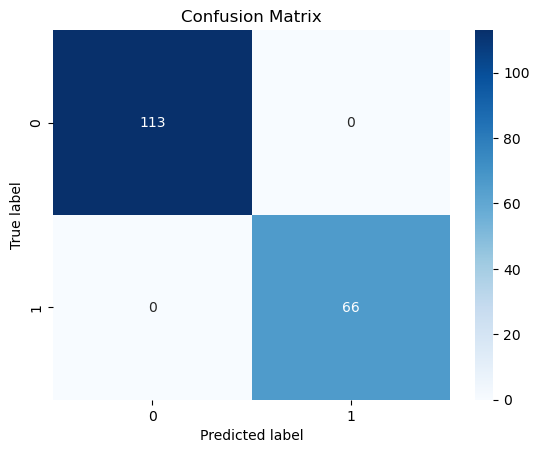

In [35]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

metrics(y_test, y_predicted)

RMSE: 0.0
R_Squared value: 1.0


In [37]:
accuracy(y_test, y_predicted)

100.0

</BR> <u> <h3>CREATING A PANEL USING TEMPLATE TO MAKE A DASHBOARD</h3></u>
* Creating a panel dashboard to show everything in one place offers a convenient, interactive, and comprehensive way to explore, analyze, and communicate insights from your dataset. It facilitates data-driven decision-making and collaboration, enhancing the value and impact of your data analysis efforts.

In [38]:
button1 = pn.widgets.Button(name="Introduction", button_type="warning", icon="file-info", styles={"width": "100%"})
button2 = pn.widgets.Button(name="Data Dictionary", button_type="warning", styles={"width":"100%"})
button3 = pn.widgets.Button(name="Data Analysis", button_type="warning", icon="clipboard-data", styles={"width": "100%"})
button4 = pn.widgets.Button(name="Machine Learning", button_type="warning", icon="timeline-event-text", styles={"width": "100%"})

In [39]:
def show_page(page_key):
    main_area.clear()
    main_area.append(mapping[page_key])

In [40]:
button1.on_click(lambda event: show_page("Page1"))
button2.on_click(lambda event: show_page("Page2"))
button3.on_click(lambda event: show_page("Page3"))
button4.on_click(lambda event: show_page("Page4"))

Watcher(inst=Button(button_type='warning', icon='timeline-event-text', name='Machine Learning', styles={'width': '100%'}), cls=<class 'panel.widgets.button.Button'>, fn=<function <lambda> at 0x000001E509554F40>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

In [41]:
# Load your JPEG image
image_path = "titanic.jpg"

# Create a JPEG pane
jpeg_pane = pn.pane.JPG(image_path, sizing_mode='scale_both')

def CreatePage1():
    return pn.Column(
        pn.pane.Markdown("# TITANIC DATA ANALYSIS"),
        pn.pane.Markdown(" RMS Titanic was a British passenger and mail carrying ocean liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 as a result of striking an iceberg.The disaster drew public attention, spurred major changes in maritime safety regulations, and inspired many artistic works."), 
        pn.pane.Markdown(" Titanic data analytics not only provides a detailed understanding of the factors that influenced the survival of its passengers but also serves as a poignant reminder of the human stories behind the numbers. Through meticulous analysis, we can learn valuable lessons about safety, emergency preparedness, and social dynamics in times of crisis. This case study continues to be a powerful tool for data scientists and historians alike, illustrating the profound impact of analytical insights on our understanding of historical events."),
        pn.Column("## Titanic Disaster", jpeg_pane)
        )

def CreatePage2():
    return pn.Column(
        pn.pane.Markdown("""| Key            | Variable          | Definition                                      |
|----------------|-------------------|-------------------------------------------------|
| survival       | Survival          | 0 = No, 1 = Yes                                 |
| pclass         | Ticket class      | 1 = 1st, 2 = 2nd, 3 = 3rd                        |
| sex            | Sex               |                                                 |
| Age (years)    | Age               |                                                 |
| sibsp          | # of siblings/spouses aboard the Titanic |
| parch          | # of parents/children aboard the Titanic |
| ticket         | Ticket number     |                                                 |
| fare (£)       | Passenger fare    |                                                 |
| cabin          | Cabin number      |                                                 |
| embarked       | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |"""),
        pn.Row(pn.Column(data1, data2, data3, data4, data5, width=550)),
        pn.Row(pn.Column(people_plot.opts(width=700),margin=(0, 25)))
    )

def CreatePage3():
    return pn.Column(
        pn.Column(
            pn.pane.Markdown("how many Males and females survived"),
            pn.Row(pn.pane.Markdown(f1, width=550),
                   pn.pane.Markdown(m1, width=550))),
        pn.Column(survived_plot.opts(width=700), margin=(0, 25)),
        pn.Column(
            pn.pane.Markdown("Survived number of passengers according to their age by making age group "),
            pn.Row(ageplot.opts(width=700), margin=(0, 25))),
        pn.Column(
            pn.pane.Markdown("Survival rate of passengers according to their ticket classes"),
            pn.Row(survived_class_plot.opts(width=700), margin=(0, 25)))
    )


ml_snippet_pane = pn.pane.JPG('ml_snippet.jpg') 
def CreatePage4():
    return pn.Column(
        pn.pane.Markdown("## What is MACHINE LEARNING (ML)"),
        pn.pane.Markdown("Machine learning is a type of artificial intelligence (AI) that allows software applications to become more accurate in predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values. Python is a popular programming language for machine learning because it has many libraries and frameworks that make it easy to implement machine learning algorithms. Some of the most popular Python libraries for machine learning include:\n Scikit-learn: A general-purpose machine learning library that includes algorithms for classification, regression, clustering, and dimensionality reduction."),
        pn.pane.Markdown("\n"),
        pn.pane.Markdown("## Why use prediction based ML model? "),
        pn.pane.Markdown("In the dataset, not every survival or survived number of passengers is given, \nSo This Model is made to predict survival of the passengers that may boarded on the Titanic Ship but data about them is not available on the dataset."),
        c1,
        y1,
        cm1,
        pn.Row("## Code Snippet", ml_snippet_pane)
    )

In [42]:
mapping = {
    "Page1": CreatePage1(),
    "Page2": CreatePage2(),
    "Page3": CreatePage3(),
    "Page4": CreatePage4()
}

Traceback (most recent call last):
 File "C:\ProgramData\anaconda3\Lib\site-packages\pyviz_comms\__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "C:\ProgramData\anaconda3\Lib\site-packages\panel\viewable.py", line 463, in _on_msg
 patch = manager.assemble(msg)
 ^^^^^^^^^^^^^^^^^^^^^
 File "C:\ProgramData\anaconda3\Lib\site-packages\panel\models\comm_manager.py", line 29, in assemble
 msg_obj = cls(header, msg['metadata'], msg['content'])
 ~~~^^^^^^^^^^^
KeyError: 'content'

BootstrapTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] BootstrapTemplateActions()
    [browser_info] BrowserInfo()
    [2083215175888] Column(styles={'width': '100%'})
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Markdown(str)
            [3] Column
                [0] Markdown(str)
                [1] JPG(str, sizing_mode='scale_both')
    [2083215840656] Column(styles={'width': '100%', ...})
        [0] Markdown(str)
        [1] Button(button_type='warning', icon='file-info', name='Introduction', styles={'width': '100%'})
        [2] Button(button_type='warning', name='Data Dictionary', styles={'width': '100%'})
        [3] Button(button_type='warning', icon='clipboard-data', name='Data Analysis', styles={'width': '100%'})
        [4] Button(button_type='warning', icon='timeline-event-text', name='Machine Learning', styles={'width': '100%'})
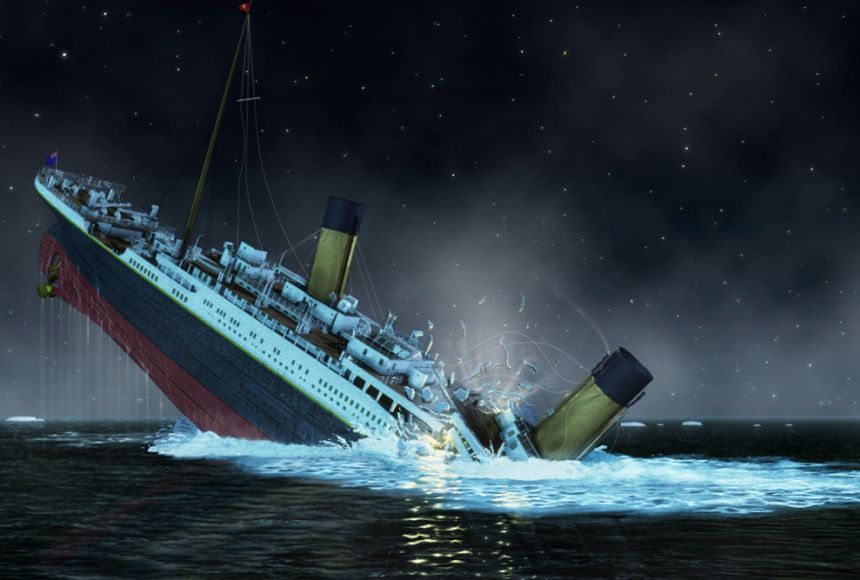

In [43]:
#################### SIDEBAR LAYOUT ##########################
sidebar = pn.Column(pn.pane.Markdown("## Pages"), button1, button2, button3, button4, styles={"width": "100%", "padding": "15px"})

#################### MAIN AREA LAYOUT ##########################
main_area = pn.Column(mapping["Page1"], styles={"width":"100%"})

###################### APP LAYOUT ##############################
template = pn.template.BootstrapTemplate(
    title=" Titanic Data Analytics Web App",
    sidebar=[sidebar],
    main=[main_area],
    header_background="black", 
    site="DASHBOARD", theme=pn.template.DarkTheme,
    sidebar_width=250, ## Default is 330
    busy_indicator=None,
)

# Serve the Panel app
template.servable()